In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df= pd.read_csv('C:/Users/Neeraj Arora/important files/insurance_data.csv')

In [4]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [5]:
df.shape

(3000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [8]:
df.duplicated().sum()

139

In [9]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [10]:
df.drop_duplicates(keep= "first", inplace= True)

In [11]:
df.duplicated().sum()

0

In [12]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 128.5 KB


In [14]:
df.skew()

Age              1.103145
Agency_Code     -0.087398
Type            -0.397178
Claimed          0.774769
Commision        3.104741
Channel         -7.698970
Duration        13.786096
Sales            2.344643
Product Name     0.415822
Destination      2.111240
dtype: float64

In [15]:
df.kurtosis()

Age               1.442122
Agency_Code      -1.319236
Type             -1.843538
Claimed          -1.400713
Commision        13.587072
Channel          57.314205
Duration        422.629934
Sales             5.965023
Product Name     -0.645924
Destination       3.132493
dtype: float64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.204124,10.678106,8.0,31.0,36.00,43.00,84.00
Agency_Code,2861.0,1.280671,1.003773,0.0,0.0,2.00,2.00,3.00
Type,2861.0,0.597344,0.490518,0.0,0.0,1.00,1.00,1.00
Claimed,2861.0,0.319469,0.466352,0.0,0.0,0.00,1.00,1.00
Commision,2861.0,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Channel,2861.0,0.983922,0.125799,0.0,1.0,1.00,1.00,1.00
Duration,2861.0,72.120238,135.977200,-1.0,12.0,28.00,66.00,4580.00
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.50,69.30,539.00
Product Name,2861.0,1.666550,1.277822,0.0,1.0,2.00,2.00,4.00
Destination,2861.0,0.261797,0.586239,0.0,0.0,0.00,0.00,2.00


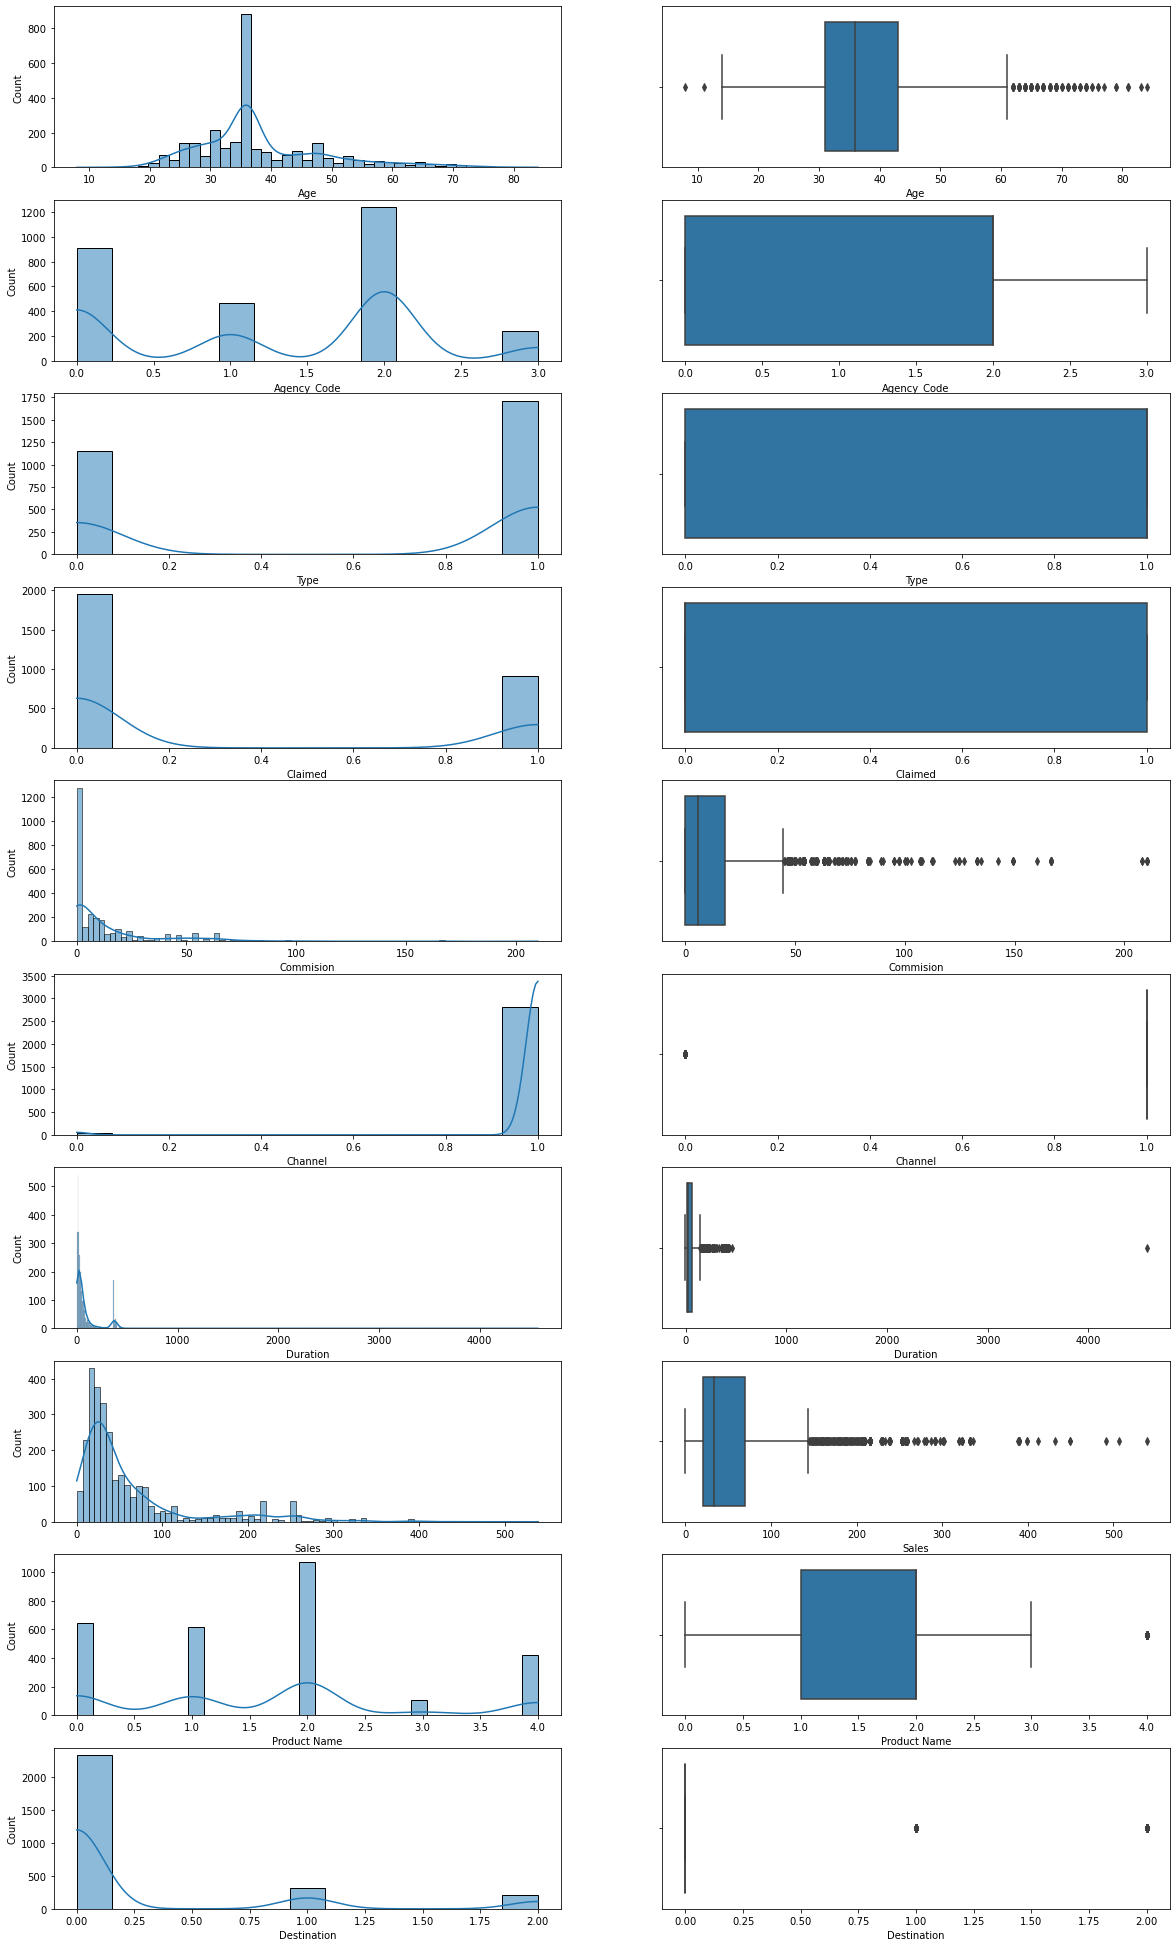

In [17]:
fig, axes = plt.subplots(nrows=10,ncols=2)
fig.set_size_inches(20,35)
sns.histplot(df['Age'], kde=True, ax=axes[0][0])
sns.boxplot(x='Age', data=df, ax=axes[0][1])
sns.histplot(df['Agency_Code'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Agency_Code', data=df , ax=axes[1][1])
sns.histplot(df['Type'], kde=True, ax=axes[2][0])
sns.boxplot(x='Type', data=df, ax=axes[2][1])
sns.histplot(df['Claimed'] , kde=True, ax=axes[3][0])
sns.boxplot(x='Claimed', data=df , ax=axes[3][1])
sns.histplot(df['Commision'] , kde=True, ax=axes[4][0])
sns.boxplot(x='Commision', data=df , ax=axes[4][1])
sns.histplot(df['Channel'] , kde=True, ax=axes[5][0])
sns.boxplot(x='Channel', data=df , ax=axes[5][1])
sns.histplot(df['Duration'] , kde=True, ax=axes[6][0])
sns.boxplot(x='Duration', data=df , ax=axes[6][1])
sns.histplot(df['Sales'] , kde=True, ax=axes[7][0])
sns.boxplot(x='Sales', data=df , ax=axes[7][1])
sns.histplot(df['Product Name'] , kde=True, ax=axes[8][0])
sns.boxplot(x='Product Name', data=df , ax=axes[8][1])
sns.histplot(df['Destination'] , kde=True, ax=axes[9][0])
sns.boxplot(x='Destination', data=df , ax=axes[9][1])
plt.show()

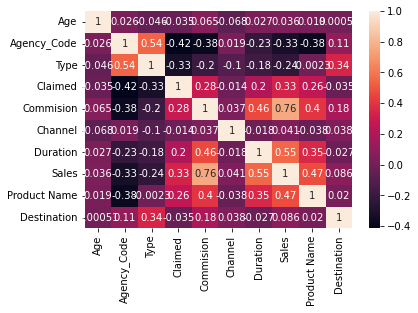

In [18]:
sns.heatmap(df.corr(),annot=True);

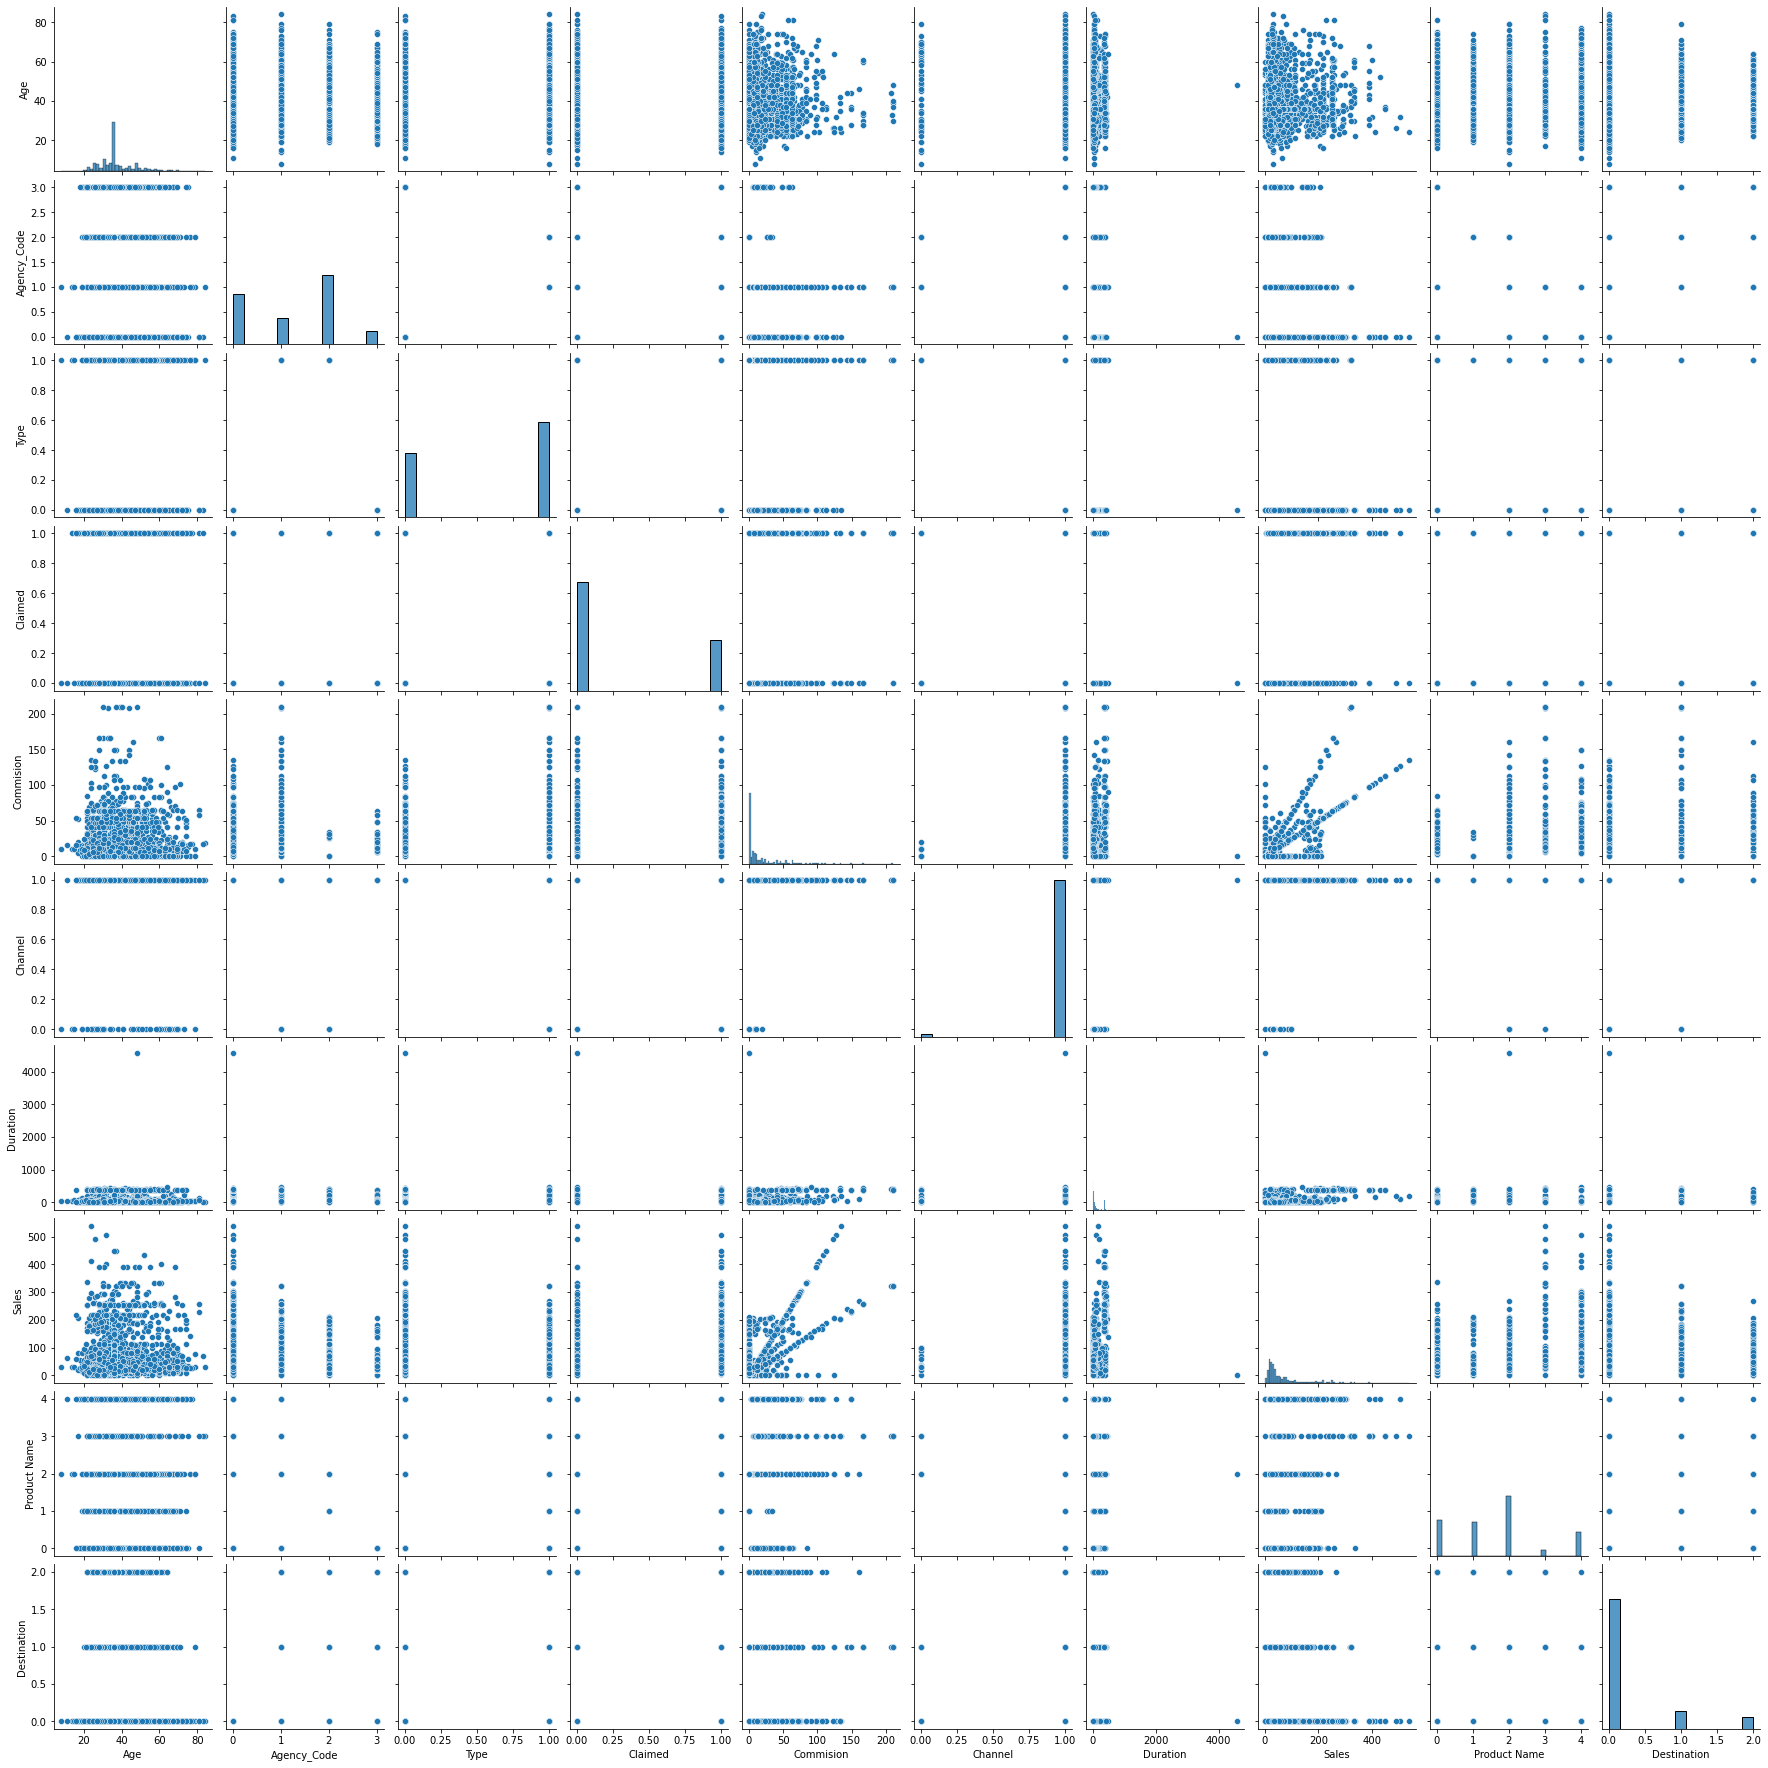

In [19]:
sns.pairplot(df)

In [20]:
df.Claimed.value_counts()

0    1947
1     914
Name: Claimed, dtype: int64

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
x= df.drop('Claimed', axis = 1)
y= df.pop('Claimed')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=1)

In [25]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [26]:
dt_model.fit(x_train, train_labels)

DecisionTreeClassifier()

In [27]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))

Credit_Tree_File.close()

In [28]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns))

                   Imp
Age           0.185998
Agency_Code   0.165715
Type          0.000000
Commision     0.079906
Channel       0.003908
Duration      0.274556
Sales         0.235900
Product Name  0.030984
Destination   0.023033


In [29]:
y_predict = dt_model.predict(x_test)

In [30]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(x_train, train_labels)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=30)

In [31]:
credit_tree_regularized = open('d:\credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(x_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns))

                   Imp
Age           0.185998
Agency_Code   0.165715
Type          0.000000
Commision     0.079906
Channel       0.003908
Duration      0.274556
Sales         0.235900
Product Name  0.030984
Destination   0.023033


In [32]:
ytrain_predict = reg_dt_model.predict(x_train)
ytest_predict = reg_dt_model.predict(x_test)

AUC: 0.833


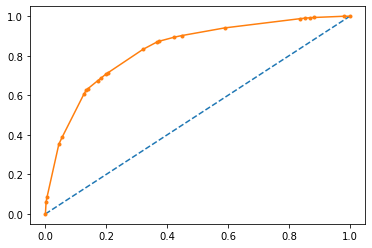

In [33]:
probs = reg_dt_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.789


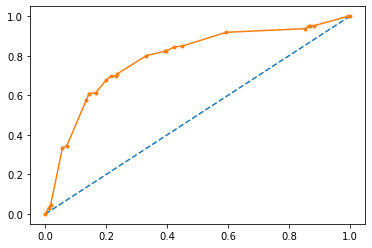

In [34]:
probs = reg_dt_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1359
           1       0.69      0.63      0.66       643

    accuracy                           0.79      2002
   macro avg       0.76      0.75      0.75      2002
weighted avg       0.78      0.79      0.79      2002



In [37]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       588
           1       0.66      0.61      0.63       271

    accuracy                           0.78       859
   macro avg       0.74      0.73      0.74       859
weighted avg       0.77      0.78      0.78       859



In [38]:
confusion_matrix(train_labels, ytrain_predict)

array([[1176,  183],
       [ 240,  403]], dtype=int64)

In [39]:
confusion_matrix(test_labels, ytest_predict)

array([[504,  84],
       [106, 165]], dtype=int64)

In [40]:
reg_dt_model.score(x_train,train_labels)

0.7887112887112887

In [41]:
reg_dt_model.score(x_test,test_labels)

0.7788125727590222

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfcl = RandomForestClassifier(n_estimators = 501)
rfcl = rfcl.fit(x_train, train_labels)

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {
    'max_depth': [5, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [46]:
grid_search.fit(x_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

In [47]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 300,
 'n_estimators': 501}

In [48]:
best_grid = grid_search.best_estimator_

In [49]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [50]:
confusion_matrix(train_labels,ytrain_predict)

array([[1225,  134],
       [ 345,  298]], dtype=int64)

In [51]:
confusion_matrix(test_labels,ytest_predict)

array([[538,  50],
       [147, 124]], dtype=int64)

In [52]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1359
           1       0.69      0.46      0.55       643

    accuracy                           0.76      2002
   macro avg       0.74      0.68      0.70      2002
weighted avg       0.75      0.76      0.75      2002



In [53]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       588
           1       0.71      0.46      0.56       271

    accuracy                           0.77       859
   macro avg       0.75      0.69      0.70       859
weighted avg       0.76      0.77      0.75       859



AUC: 0.806


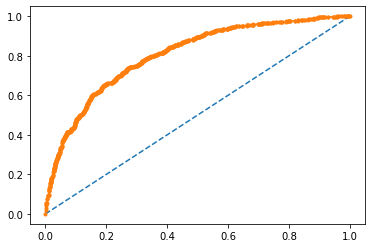

In [54]:
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.819


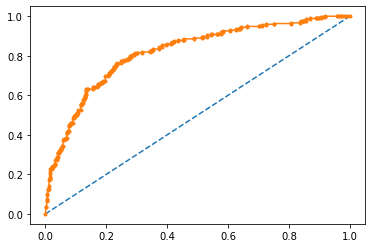

In [55]:
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state=20)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc = StandardScaler()

In [59]:
x_train = sc.fit_transform(x_train)

In [60]:
x_train

array([[-0.1991652 ,  0.70357421,  0.79893546, ..., -0.58504826,
         0.2628929 , -0.44636324],
       [-0.1991652 ,  0.70357421,  0.79893546, ..., -0.43857922,
        -0.5285531 , -0.44636324],
       [-0.96891179, -1.30721176, -1.25166556, ..., -0.64363587,
        -1.31999909, -0.44636324],
       ...,
       [-0.1991652 ,  0.70357421,  0.79893546, ..., -0.58504826,
         0.2628929 , -0.44636324],
       [-0.1991652 ,  0.70357421,  0.79893546, ..., -0.55575445,
        -0.5285531 , -0.44636324],
       [-0.87269346, -1.30721176, -1.25166556, ..., -0.58504826,
        -1.31999909, -0.44636324]])

In [61]:
x_test = sc.transform(x_test)

In [62]:
x_test

array([[ 0.37814474, -1.30721176, -1.25166556, ..., -0.58504826,
        -1.31999909, -0.44636324],
       [-0.48782017,  1.7089672 , -1.25166556, ..., -0.55575445,
        -1.31999909, -0.44636324],
       [-0.68025682, -0.30181877,  0.79893546, ..., -0.44297329,
         0.2628929 , -0.44636324],
       ...,
       [-0.1991652 ,  0.70357421,  0.79893546, ..., -0.7315173 ,
        -0.5285531 , -0.44636324],
       [ 1.34032797, -0.30181877,  0.79893546, ..., -0.44297329,
         0.2628929 ,  2.94498098],
       [-0.87269346, -0.30181877,  0.79893546, ..., -0.58797764,
         0.2628929 ,  1.24930887]])

In [64]:
from sklearn.neural_network import MLPClassifier

In [65]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=500,solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [66]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 0.64470322
Iteration 2, loss = 0.62954294
Iteration 3, loss = 0.61290884
Iteration 4, loss = 0.59774285
Iteration 5, loss = 0.58486420
Iteration 6, loss = 0.57400540
Iteration 7, loss = 0.56483947
Iteration 8, loss = 0.55832739
Iteration 9, loss = 0.55431916
Iteration 10, loss = 0.54980401
Iteration 11, loss = 0.54516097
Iteration 12, loss = 0.54091783
Iteration 13, loss = 0.53718498
Iteration 14, loss = 0.53431980
Iteration 15, loss = 0.53151515
Iteration 16, loss = 0.52876797
Iteration 17, loss = 0.52656279
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [67]:
from sklearn.metrics import confusion_matrix,classification_report

In [68]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[554,  29],
       [193,  83]], dtype=int64)

In [69]:
pred2 = clf.predict(x_train)
confusion_matrix(y_train,pred2)

array([[1310,   54],
       [ 471,  167]], dtype=int64)

In [72]:
print(classification_report(y_train, pred2))

              precision    recall  f1-score   support

           0       0.74      0.96      0.83      1364
           1       0.76      0.26      0.39       638

    accuracy                           0.74      2002
   macro avg       0.75      0.61      0.61      2002
weighted avg       0.74      0.74      0.69      2002



In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       583
           1       0.74      0.30      0.43       276

    accuracy                           0.74       859
   macro avg       0.74      0.63      0.63       859
weighted avg       0.74      0.74      0.70       859



AUC: 0.784


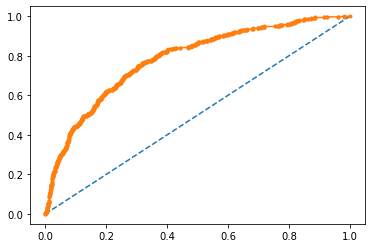

In [74]:
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.788


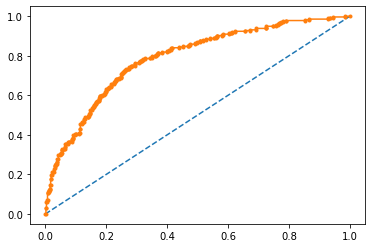

In [75]:
probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()